In [1]:
# Import pandas 
import pandas as pd 
  
# reading csv file  
df = pd.read_csv("intern_dataset.csv") 
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [9]:
#Dropping empty rows
df.dropna(inplace=True)
df.describe

<bound method NDFrame.describe of                            Time       Signal1   Signal2 Label
0       2017-08-14 11:37:49.791  33668.091913  0.856726     A
1       2017-08-14 11:37:49.801  32564.903040  0.856705     A
2       2017-08-14 11:37:49.811  31454.043305  0.856683     A
3       2017-08-14 11:37:49.821  30335.387166  0.856659     A
4       2017-08-14 11:37:49.831  29207.142938  0.856634     A
...                         ...           ...       ...   ...
911995  2020-01-04 10:55:49.186  34673.811155  0.151395     C
911996  2020-01-04 10:55:49.196  34672.951723  0.151385     C
911997  2020-01-04 10:55:49.206  34671.967555  0.151373     C
911998  2020-01-04 10:55:49.216  34670.877944  0.151359     C
911999  2020-01-04 10:55:49.226  34669.694865  0.151342     C

[912000 rows x 4 columns]>

Normal Scatter Plot

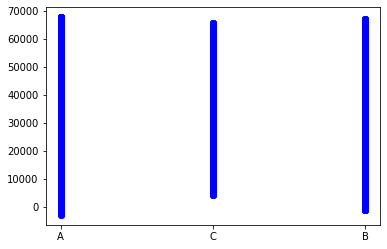

In [10]:
import numpy as np 
import matplotlib.pyplot as plt  

# creating the scatter plot 
plt.scatter(df["Label"], df["Signal1"], c ='blue') 

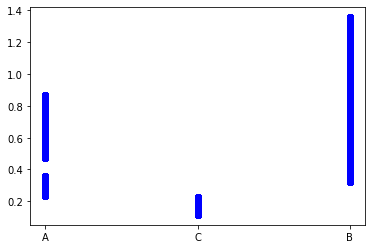

In [4]:
plt.scatter(df["Label"], df["Signal2"], c ='blue') 
plt.show()

# Hurst Exponent

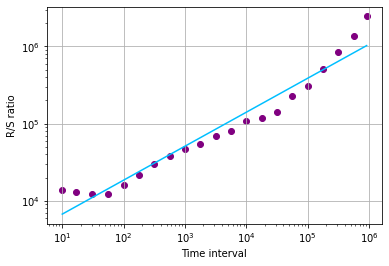

H=0.4399, c=2443.9468


In [11]:
from hurst import compute_Hc, random_walk

#Passing datSignal1l1 as series here
series = df.Signal1

#Computing Hurst value for data Signal1
H, c, data = compute_Hc(series, kind='change', simplified=True)    #used kind = change since it computes for random values

# Plotting the data received after calculating the Hurst exponent
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

Observations:
This is an anti-persistent system for Signal1 since H=0.4399

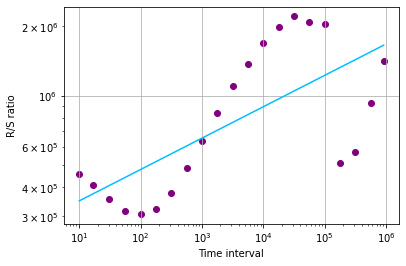

H=0.1360, c=255603.7357


In [12]:
from hurst import compute_Hc, random_walk

series = df.Signal2

#Computing Hurst value for data Signal1
H, c, data = compute_Hc(series, kind='change', simplified=True)

# Plot
f, ax = plt.subplots()
ax.plot(data[0], c*data[0]**H, color="deepskyblue")
ax.scatter(data[0], data[1], color="purple")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Time interval')
ax.set_ylabel('R/S ratio')
ax.grid(True)
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

Observations:
This is an anti-persistent system for Signal2 since H=0.1360
Looks like a cosine wave or something

# DFA

The idea behind DFA originates from the definition of self-affine processes. A process X is said to be self-affine if the standard deviation of the values within a window of length n changes with the window length factor L in a power law:

std(X,L * n) = L^H * std(X, n)

where std(X, k) is the standard deviation of the process X calculated over windows of size k. In this equation, H is called the Hurst parameter, which behaves indeed very similar to the Hurst exponent.

In [4]:
import nolds
nvals = nolds.dfa(df.Signal1,order=1,fit_trend='poly')
print(nvals)

0.6856956026469625


In [18]:
import numpy as np
import hfda

k_max = 5

D1 = hfda.measure(df.Signal1, k_max)

D2 = hfda.measure(df.Signal2, k_max)
print(D1)
print(D2)

1.0066366747024675
1.0002017709289643


# MFDFA

MFDFA for Signal1

In [25]:
#!pip install MFDFA
from MFDFA import MFDFA

y= np.array(df.Signal1)
# Select a band of lags, which usually ranges from very small segments of data, to very long ones, as
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))

# Notice these must be ints, since these will segment the data into chucks of lag size
# Select the power q
q = 2

# The order of the polynomial fitting
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

array([2.10914766])

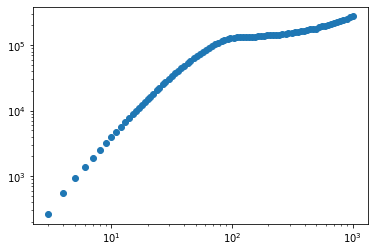

In [26]:
# To uncover the Hurst index, lets get some log-log plots
plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

# And now we need to fit the line to find the slope. We will
# fit the first points, since the results are more accurate
# there. Don't forget that if you are seeing in log-log
# scales, you need to fit the logs of the results
np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]

# Now what you should obtain is: slope = H + 1

MFDFA for Signal2

array([2.53902648])

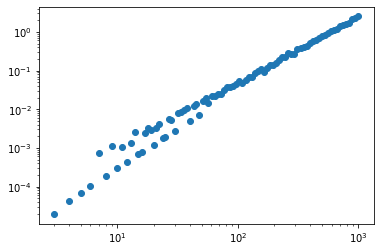

In [27]:
#MFDFA For Signal2

y= np.array(df.Signal2)
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
q = 2
order = 1

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q, order = order)

plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]

MFDFA for q value = list of values and order = 2 using quadratic polynomial fitting

In [28]:
# Select a list of powers q
q_list = np.linspace(-10,10,41)
q_list = q_list[q_list!=0.0]

array([6.83653413, 6.83128706, 6.82529259, 6.81836404, 6.81024741,
       6.80058943, 6.78888685, 6.77440405, 6.75603601, 6.73207599,
       6.69981698, 6.65486522, 6.58996562, 6.49303659, 6.34411989,
       6.11177722, 5.75068489, 5.18266958, 4.20359884, 3.47711764,
       3.28239491, 3.23961995, 3.21479475, 3.19747513, 3.18176984,
       3.16166763, 3.13189945, 3.09563571, 3.06083825, 3.03191719,
       3.01001461, 2.99481184, 2.98531931, 2.98023252, 2.97828985,
       2.97853144, 2.98033808, 2.98333241, 2.98726382, 2.99193317])

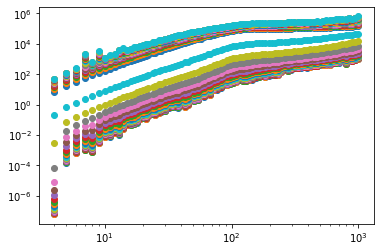

In [33]:
y= np.array(df.Signal1)
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q_list, order = order)

plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]

array([5.33840686, 5.33508033, 5.33141488, 5.32734011, 5.32275774,
       5.31752545, 5.31142949, 5.30413709, 5.29511277, 5.28346735,
       5.26768035, 5.24507753, 5.21082609, 5.15598872, 5.06394358,
       4.90547842, 4.63968246, 4.2337573 , 3.74272049, 3.43880937,
       3.31000329, 3.66554669, 4.56899407, 5.01595429, 5.23212299,
       5.35213406, 5.42533223, 5.47271447, 5.50458273, 5.52654097,
       5.54188188, 5.5526606 , 5.56022208, 5.56547902, 5.56906773,
       5.57144061, 5.5729239 , 5.57375535, 5.57410952, 5.57411538])

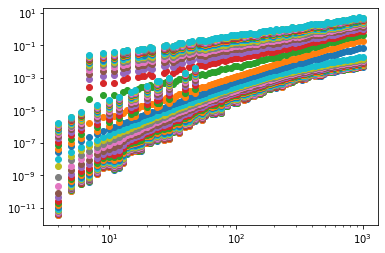

In [32]:
y= np.array(df.Signal2)
lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
order = 2

# Obtain the (MF)DFA as
lag, dfa = MFDFA(y, lag = lag, q = q_list, order = order)

plt.loglog(lag, dfa, 'o', label='fOU: MFDFA q=2')

np.polyfit(np.log(lag[:15]), np.log(dfa[:15]),1)[0]

Observations:
1. The affinity of Signal2 does not look that close or cohesive in nature since initially it drifts away from the others. 
However at the high end of spectrum, it forms close affinity with each other

2. For Signal1, dispersion is seen for 1/4 th of the start of whole graph only. Affinity increases for the rest 3/4th part.